In [66]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, dcg_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
t1 = pd.read_csv('train.csv')
t2 = pd.read_csv('test.csv')
df = pd.concat([t1,t2])
df

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,68914,2,3.0,...,NaN,NaN,NaN,NaN,0.0,0.0,11.0,1,114.29,1
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,139893,2,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0
2,6,2013-06-05 12:27:51,14,100,NaN,NaN,100,104251,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,162.38,1
3,8,2013-03-20 17:50:44,5,219,NaN,NaN,219,27669,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,96.41,1
4,11,2013-02-25 08:39:33,5,219,NaN,NaN,219,20499,2,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91841,332755,2013-06-12 07:31:28,5,219,NaN,NaN,219,103769,0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
91842,332755,2013-06-12 07:31:28,5,219,NaN,NaN,219,108318,2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
91843,332755,2013-06-12 07:31:28,5,219,NaN,NaN,219,115328,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
91844,332755,2013-06-12 07:31:28,5,219,NaN,NaN,219,128580,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [3]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [4]:
df['rating'] = df['click_bool'] + (4 * df['booking_bool'])

In [5]:
clicked = df[df['click_bool']==1]

print(df['click_bool'].value_counts())
print(clicked['booking_bool'].value_counts())

0    237319
1    221879
Name: click_bool, dtype: int64
1    138390
0     83489
Name: booking_bool, dtype: int64


Text(0.5, 1.0, 'Clicked on grouped by review score')

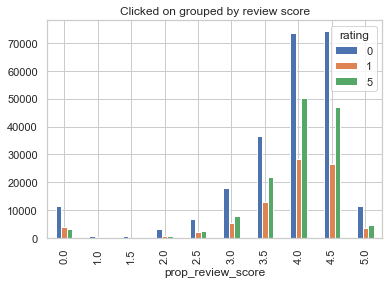

In [6]:
pd.crosstab(df.prop_review_score,df.rating).plot(kind='bar')
plt.title('Clicked on grouped by review score')

Text(0.5, 1.0, 'Clicked on grouped by star rating')

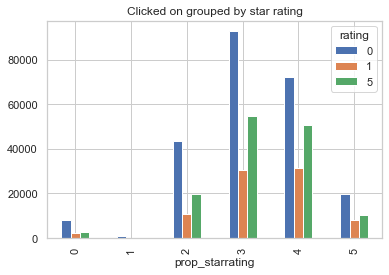

In [7]:
pd.crosstab(df.prop_starrating,df.rating).plot(kind='bar')
plt.title('Clicked on grouped by star rating')

Text(0.5, 1.0, 'Booked after clicking grouped by rating')

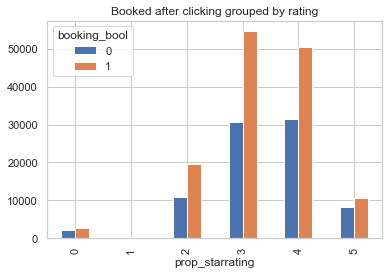

In [8]:
pd.crosstab(clicked.prop_starrating,clicked.booking_bool).plot(kind='bar')
plt.title('Booked after clicking grouped by rating')

In [17]:
train =  df[['prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 
           'prop_location_score2', 'price_usd', 'promotion_flag', 'click_bool', 'booking_bool', 'rating']]
train.isna().sum()

prop_starrating             0
prop_review_score         642
prop_brand_bool             0
prop_location_score1        0
prop_location_score2    79743
price_usd                   0
promotion_flag              0
click_bool                  0
booking_bool                0
rating                      0
dtype: int64

In [18]:
train = train.fillna(-1)
train.isna().sum()

prop_starrating         0
prop_review_score       0
prop_brand_bool         0
prop_location_score1    0
prop_location_score2    0
price_usd               0
promotion_flag          0
click_bool              0
booking_bool            0
rating                  0
dtype: int64

In [19]:
'''
X = train[['prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 
           'prop_location_score2', 'price_usd', 'promotion_flag']]
y = train['rating']
'''

X = train[['prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 
           'prop_location_score2', 'price_usd', 'promotion_flag']]
y = train['rating']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

'''
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
n_estimators = [1, 5, 10, 15, 20, 25, 30]
max_features = [2, 3, 4, 5]

new_train_score = 0
new_test_score = 0

for lr in lr_list:
    for est in n_estimators:
        for feat in max_features:
            gb_clf = GradientBoostingRegressor(n_estimators=est, learning_rate=lr, max_features=feat, max_depth=2, random_state=0)
            gb_clf.fit(X_train, y_train)
            train_score = gb_clf.score(X_train, y_train)
            test_score = gb_clf.score(X_test, y_test)
            if train_score > new_train_score:
                new_train_score = train_score
                print("Learning rate: {}".format(lr))
                print("Estimators: {}".format(est))
                print("Features: {}".format(feat))
                print(gb_clf.score(X_train, y_train))
                print(gb_clf.score(X_test, y_test))
                print(" ")
            elif test_score > new_test_score:
                new_test_score = test_score
                print("Learning rate: {}".format(lr))
                print("Estimators: {}".format(est))
                print("Features: {}".format(feat))
                print(gb_clf.score(X_train, y_train))
                print(gb_clf.score(X_test, y_test))
                print(" ")
                
'''

Learning rate: 0.05
Estimators: 1
Features: 2
0.004380782112391346
0.004427039501845198
 
Learning rate: 0.05
Estimators: 1
Features: 3
0.005235695578063471
0.005194689639049455
 
Learning rate: 0.05
Estimators: 1
Features: 4
0.004565954342578782
0.004578262579245873
 
Learning rate: 0.05
Estimators: 1
Features: 5
0.005606827179429064
0.00549853701519154
 
Learning rate: 0.05
Estimators: 5
Features: 2
0.014268628461655997
0.014292643081456724
 
Learning rate: 0.05
Estimators: 5
Features: 3
0.013589517246761162
0.01359406919402173
 
Learning rate: 0.05
Estimators: 5
Features: 4
0.015281501287364718
0.015276150793879673
 
Learning rate: 0.05
Estimators: 5
Features: 5
0.01778632581978734
0.017701858948030003
 
Learning rate: 0.05
Estimators: 10
Features: 2
0.02461927485399995
0.02465101982086071
 
Learning rate: 0.05
Estimators: 10
Features: 3
0.030209087811337243
0.02989846765311044
 
Learning rate: 0.05
Estimators: 10
Features: 4
0.032138624442616504
0.03199251606639553
 
Learning rate:

0.10290835715636026
0.09976284807659107


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

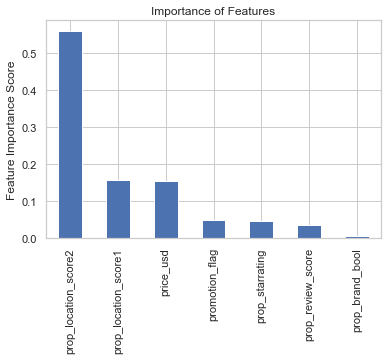

In [104]:
classifier = GradientBoostingRegressor(n_estimators=30, learning_rate=0.5, max_features=7, max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
print(gb_clf.score(X_train, y_train))
print(gb_clf.score(X_test, y_test))
predictions = classifier.predict(X_test)
#print(predictions)
predictors = list(X_train)
feat_imp = pd.Series(classifier.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
predict=classifier.predict(X_test)
print(classification_report(y_test, predict))

In [89]:
test1 = pd.read_csv('test_set_VU_DM.csv')
test2 =  test1[['prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 
           'prop_location_score2', 'price_usd', 'promotion_flag']]
test2 = test2.fillna(-1)

In [90]:
pred = classifier.predict(test2)

In [91]:
test1['ranking'] = pred
test1['ranking'].to_csv('ranking_column.csv', index=False)

In [94]:
#test1['Within_rank'] = test1.groupby('srch_id')['ranking'].rank(ascending=False)
test3 = test1
test3.sort_values(['srch_id','ranking'],ascending=False).groupby('srch_id')

In [79]:
test3 = test1.sort_values(['srch_id', 'Within_rank'],ascending=False).groupby('srch_id')

In [77]:
test4 = test3.sort_values('srch_id')

In [31]:
#dcg_score(y_test, predictions)

In [32]:
'''
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

from collections import Counter
print(Counter(predictions))

predictors = list(X_train)
feat_imp = pd.Series(classifier.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
pred=classifier.predict(X_test)
print(classification_report(y_test, pred))'''

'\nprint("Confusion Matrix:")\nprint(confusion_matrix(y_test, predictions))\n\nprint("Classification Report")\nprint(classification_report(y_test, predictions))\n\nfrom collections import Counter\nprint(Counter(predictions))\n\npredictors = list(X_train)\nfeat_imp = pd.Series(classifier.feature_importances_, predictors).sort_values(ascending=False)\nfeat_imp.plot(kind=\'bar\', title=\'Importance of Features\')\nplt.ylabel(\'Feature Importance Score\')\npred=classifier.predict(X_test)\nprint(classification_report(y_test, pred))'

In [33]:
#y_pred = logreg.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [34]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)